**Low Pass Filter**: Removes Noise, Smoothens the image, 
**High Pass Filter**: Finds the Edges in the Image


**Gaussian Filter**: Used to reduce image noise and reduce detail.

* 1D Gaussian: `G(x, n) = (exp(-x² / 2 * n²)) / (2 * pi *  n²) ** 0.5`
* 2D Gaussian: `G(x, y, n) = (exp(-(x² + y²) / 2 * n²)) / (2 * pi *  n²)`

where n is standard deviation

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cv2

In [69]:
!wget 'https://pmctvline2.files.wordpress.com/2018/02/family-guy-stewie.jpg'
i_img_path = 'family-guy-stewie.jpg'

--2020-07-26 17:20:14--  https://pmctvline2.files.wordpress.com/2018/02/family-guy-stewie.jpg
Resolving pmctvline2.files.wordpress.com (pmctvline2.files.wordpress.com)... 192.0.72.26, 192.0.72.27
Connecting to pmctvline2.files.wordpress.com (pmctvline2.files.wordpress.com)|192.0.72.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98136 (96K) [image/jpeg]
Saving to: ‘family-guy-stewie.jpg.1’

family-guy-stewie.j 100%[===================>]  95.84K  --.-KB/s    in 0.03s   

2020-07-26 17:20:14 (3.57 MB/s) - ‘family-guy-stewie.jpg.1’ saved [98136/98136]



In [44]:
# Implementation of 2d Discrete Gaussian Filter

def gauss_blur_2d(x, y, n=1.0):
  return np.exp(-((x ** 2) + (y ** 2)) / (2 * (n ** 2))) / (2 * np.pi * (n ** 2))

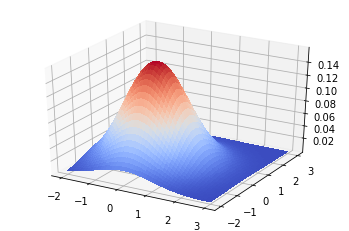

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

filter_size = (5, 5)

x = np.floor(filter_size[0] / 2).astype(int)
y = np.floor(filter_size[1] / 2).astype(int)
_x = np.arange(-x, x + 1, .01)
_y = np.arange(-y, y + 1, .01)

xx, yy = np.meshgrid(_x, _y)
g = gauss_blur_2d(xx, yy)


ax.plot_surface(xx, yy, g, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

Text(0.5, 1.0, 'Gaussian Smoothing')

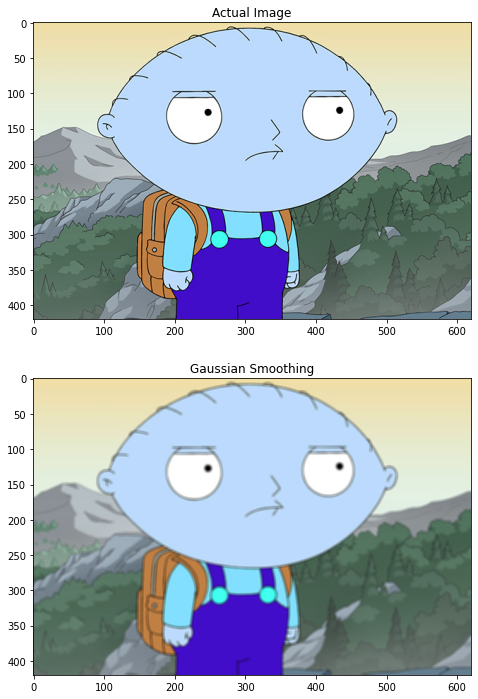

In [124]:
img = cv2.imread(i_img_path)

filter_size = (5, 5)

x = np.floor(filter_size[0] / 2).astype(int)
y = np.floor(filter_size[1] / 2).astype(int)
_x = np.arange(-x, x + 1, 1)
_y = np.arange(-y, y + 1, 1)

xx, yy = np.meshgrid(_x, _y)
kernel = gauss_blur_2d(xx, yy, n=50)
kernel = kernel / np.sum(kernel)
dst = cv2.filter2D(img,-1, kernel)
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 12)
axs[0].imshow(img); axs[0].set_title('Actual Image')
axs[1].imshow(dst); axs[1].set_title('Gaussian Smoothing')

**Other Filters**: Box(Averaging) FIlter, Median Filter(Good for slat and pepper noise)

**Bilateral Filters**: Reduces Noises but keep edges (which is limitation of above)

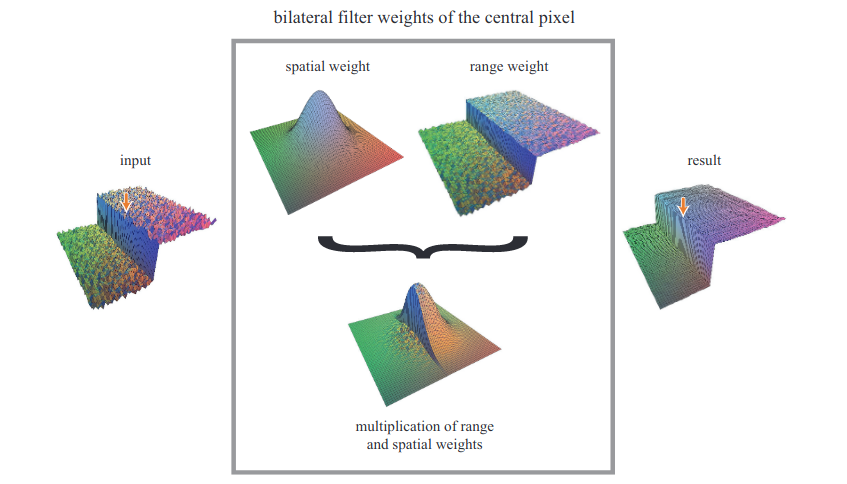

Text(0.5, 1.0, 'Bilateral Smoothing')

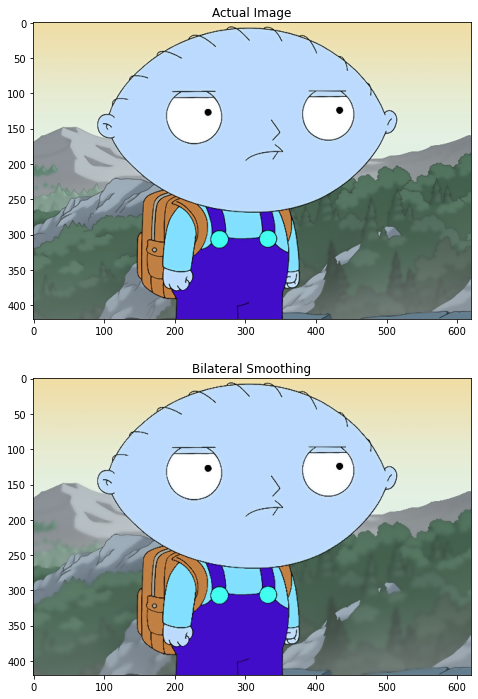

In [126]:
dst = cv2.bilateralFilter(img,9,75,75,)
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 12)
axs[0].imshow(img); axs[0].set_title('Actual Image')
axs[1].imshow(dst); axs[1].set_title('Bilateral Smoothing')